# Competition 
   **Domain-Finance & Insurance**<br>
    Group ------ Group 11<br>
    Members -- Kevin m,Shilpa Shibu,Roopa Thomas,Sreelekshmi M K 

## 1.Data Collection
Data-https://github.com/kevin-m-s/kevin-m-s-Norka_DSA-_B3-2021-Competition


<u>Context</u>

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.


<u>Business Goalt</u>

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.


<u>Evaluation</u>

This is a Classification problem since we're predicting whether the customer is interested in the vehicle insurance or not

In [1]:
#importing pandas,numply,matplotlib.pyplot,seaborn libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset to the python environment
data= pd.read_csv('competition vehicle insurancefinal.csv')
#displaying  top 5  rows of the dataset
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [3]:
#to display all columns of data frame
pd.set_option('display.max_columns', None)

In [4]:
#to know shape of dataset
data.shape

(5000, 12)

In [5]:
#To know data types of each columns and checking for null values in the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    5000 non-null   int64 
 1   Gender                5000 non-null   object
 2   Age                   5000 non-null   int64 
 3   Driving_License       5000 non-null   int64 
 4   Region_Code           5000 non-null   int64 
 5   Previously_Insured    5000 non-null   int64 
 6   Vehicle_Age           5000 non-null   object
 7   Vehicle_Damage        5000 non-null   object
 8   Annual_Premium        5000 non-null   int64 
 9   Policy_Sales_Channel  5000 non-null   int64 
 10  Vintage               5000 non-null   int64 
 11  Response              5000 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 468.9+ KB


<u>About our Dataset</u> <strong>  
    
- The Dataset contains deatails of customers from Health Insurance comapny <br> 
- There are 12 columns/features/details  <br>  
- 9 of the features are numerical and 3 are object data type. .<br> 
- Also there are no null values present in the dataset  <br> </strong>  
    
feature Description<br>

- id : 	              Unique ID for the customer<br>
- Gender: 	 Gender of the customer<br>
- Age: 	Age of the customer<br>
- Driving_License :	0 : Customer does not have DL, 1 : Customer already has DL<br>
- Region_Code: 	Unique code for the region of the customer<br>
- Previously_Insured: 	1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance<br>
- Vehicle_Age: 	Age of the Vehicle<br>
- Vehicle_Damage: 	1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.<br>
- Annual_Premium: 	The amount customer needs to pay as premium in the year<br>
- PolicySalesChannel: 	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.<br>
- Vintage: 	Number of Days, Customer has been associated with the company<br>
- Response: 	1 : Customer is interested, 0 : Customer is not interested<br>
    
</div>

In [6]:
data.describe(include='all')

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,5000.000000,5000,5000.00000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000,5000.000000,5000.000000
unique,NaN,2,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN,NaN
top,NaN,Male,NaN,NaN,NaN,NaN,1-2 Year,Yes,NaN,NaN,NaN,NaN
freq,NaN,2702,NaN,NaN,NaN,NaN,2598,2585,NaN,NaN,NaN,NaN
mean,2500.500000,NaN,38.68200,0.997800,26.201000,0.441600,NaN,NaN,30929.683400,112.909600,156.145600,0.123800
std,1443.520003,NaN,15.47505,0.046857,13.173918,0.496627,NaN,NaN,16732.411341,53.607076,83.681385,0.329386
min,1.000000,NaN,20.00000,0.000000,0.000000,0.000000,NaN,NaN,2630.000000,1.000000,10.000000,0.000000
25%,1250.750000,NaN,24.00000,1.000000,15.000000,0.000000,NaN,NaN,24814.000000,40.750000,85.000000,0.000000
50%,2500.500000,NaN,36.00000,1.000000,28.000000,0.000000,NaN,NaN,31967.000000,136.000000,156.000000,0.000000
75%,3750.250000,NaN,49.00000,1.000000,35.000000,1.000000,NaN,NaN,39816.000000,152.000000,229.000000,0.000000


## 2. Pre-processing

#### 2.1 Missing Value handling

In [7]:
#Check for the null values present in each column of  dataset using 'isnull().sum()' function
##the percentage of missing values for each variable
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = round(data.isnull().mean()*100,2).sort_values(ascending=False)
missing_data = pd.concat([total, percent_1], axis=1, keys=['Total', '%'])
missing_data.head(4)

,Total,%
id,0,0.0
Gender,0,0.0
Age,0,0.0
Driving_License,0,0.0


**Note:**
    
**No Null values**

#### 2.2 Outlier Detection & Handling

In [8]:
#numerical features
num_data = data[['Age','Vintage','Annual_Premium']]

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


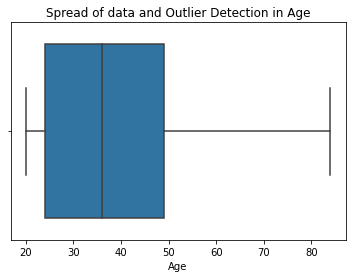

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


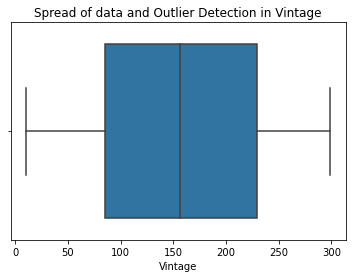

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


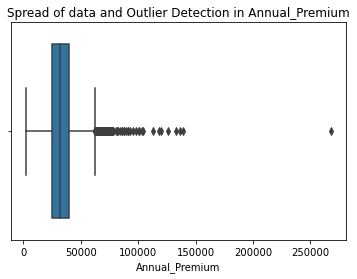

In [9]:
#boxplot for checking outliers
for i in num_data .columns:
    sns.boxplot(num_data [i])
    plt.title(f"Spread of data and Outlier Detection in {i}")
    plt.show()

In [10]:
num_data.skew()

Age               0.689671
Vintage          -0.014108
Annual_Premium    0.752798
dtype: float64

Note:

There are outliers in Annual_Premium

In [11]:
#defining quantiles
Q1=np.percentile(data['Annual_Premium'],25,interpolation='midpoint')
Q2=np.percentile(data['Annual_Premium'],50,interpolation='midpoint')
Q3=np.percentile(data['Annual_Premium'],75,interpolation='midpoint')
print("Q1",Q1)
print("Q2",Q2)
print("Q3",Q3)
IQR=Q3-Q1
print("IQR",IQR)
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print("Lower limit",low_lim)
print("Upper Limit",up_lim)

Q1 24813.0
Q2 31967.0
Q3 39816.0
IQR 15003.0
Lower limit 2308.5
Upper Limit 62320.5


In [12]:
outlier=[]
for x in data['Annual_Premium']:
    if((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier.sort()
print('The count of  is:', len(outlier))
print("outliers",(outlier))

The count of  is: 136
outliers [62324, 62477, 62502, 62636, 62684, 62734, 62752, 62806, 62922, 62959, 63124, 63198, 63423, 63440, 63452, 64325, 64378, 64605, 64679, 64702, 64819, 64872, 64942, 65040, 65093, 65212, 65237, 65387, 65452, 65472, 65479, 65580, 65606, 65739, 66210, 66266, 66338, 66434, 66482, 66489, 66657, 66713, 66836, 66952, 67117, 67237, 67237, 67251, 67386, 67466, 67473, 67477, 67533, 67689, 67745, 67780, 67831, 67888, 68027, 68028, 68036, 68147, 68192, 68241, 68344, 68538, 68548, 68850, 69009, 69402, 69856, 69967, 69995, 70032, 70049, 70479, 70537, 70574, 70885, 70905, 71479, 71595, 71601, 71611, 72004, 72033, 72167, 72357, 72389, 72544, 72611, 72904, 72989, 73007, 73176, 73440, 73929, 74371, 74869, 75504, 75864, 76146, 76251, 76536, 76651, 77474, 77603, 77859, 78383, 78418, 80682, 81859, 82705, 84142, 85786, 86283, 87273, 87831, 89282, 90789, 91520, 92716, 95217, 98002, 101021, 101064, 103026, 104002, 112974, 117799, 119735, 125643, 133098, 136061, 139130, 267698]


In [13]:
index=data['Annual_Premium'][(data['Annual_Premium']>up_lim)|(data['Annual_Premium']<low_lim)].index
index

Int64Index([  37,   67,  149,  167,  176,  216,  310,  315,  362,  375,
            ...
            4683, 4695, 4762, 4797, 4807, 4868, 4888, 4896, 4917, 4929],
           dtype='int64', length=136)

In [14]:
data.drop(index,inplace=True)

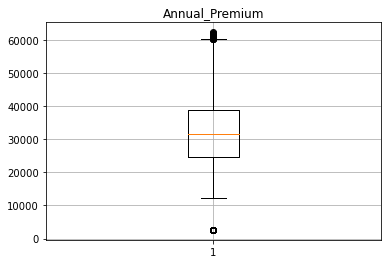

In [15]:
plt.boxplot(data['Annual_Premium'])
plt.title('Annual_Premium')
plt.grid()

Note;

Outliers reduced in Annual_Premium

#### 2.3 Encoding

In [16]:
data2=data.copy()

**Label encoding**

In [17]:
#using Label encoding for categorical features
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data['Gender']=label_en.fit_transform(data['Gender'])
data['Vehicle_Damage']=label_en.fit_transform(data['Vehicle_Damage'])
data['Vehicle_Age']=label_en.fit_transform(data['Vehicle_Age'])

In [18]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,0,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,1,0,28619,152,203,0
4,5,0,29,1,41,1,1,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1,36,1,8,0,2,1,40278,124,62,0
4996,4997,1,44,1,10,0,0,1,27438,124,208,1
4997,4998,1,58,1,28,0,0,1,50889,26,105,0
4998,4999,1,31,1,28,1,0,0,36457,124,75,0


Except region and  policy sales channel , all other features can be label encoded as they have only around 2-3 unique categories

As region code and sales channel policy have more than 50 unique categories, we cannot encode them directly.

To prevent that, we will group together all categories which contribute less than 2% to the total records in the dataset under the category "others".

In [19]:
Region_Dict = {}
for i,a in list(zip(data.Region_Code.value_counts().index.unique(),data.Region_Code.value_counts(1)*100)):
    if a < 2:
        Region_Dict[i] = "Others"
    else:
        Region_Dict[i] = "Region_" + str(i)

In [20]:
Policy_Sales_Channel_Dict = {}
for i,a in list(zip(data.Policy_Sales_Channel.value_counts().index.unique(),data.Policy_Sales_Channel.value_counts(1)*100)):
    if a < 2:
        Policy_Sales_Channel_Dict[i] = "Others"
    else:
        Policy_Sales_Channel_Dict[i] = "Channel_" + str(i)

In [21]:
data.Region_Code = data.Region_Code.map(Region_Dict)

In [22]:
data.Policy_Sales_Channel = data.Policy_Sales_Channel.map(Policy_Sales_Channel_Dict)

In [23]:
data.Region_Code.value_counts().head(20)

Others       1507
Region_28    1326
Region_8      449
Region_46     258
Region_41     236
Region_15     177
Region_30     175
Region_29     137
Region_3      134
Region_50     130
Region_11     118
Region_36     117
Region_35     100
Name: Region_Code, dtype: int64

In [24]:
data.Policy_Sales_Channel.value_counts().head(20)

Channel_152    1723
Channel_26      975
Channel_124     966
Others          628
Channel_160     310
Channel_122     135
Channel_156     127
Name: Policy_Sales_Channel, dtype: int64

In [25]:
#label encoding Region_Code,Policy_Sales_Channel
from sklearn.preprocessing import LabelEncoder
col = ['Region_Code', 'Policy_Sales_Channel']
le = LabelEncoder()
for LE in col:
    data[LE] = le.fit_transform(data[LE])

In [26]:
data

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,3,0,2,1,40454,5,217,1
1,2,1,76,1,5,0,0,0,33536,5,183,0
2,3,1,47,1,3,0,2,1,38294,5,27,1
3,4,1,21,1,1,1,1,0,28619,2,203,0
4,5,0,29,1,9,1,1,0,27496,2,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,1,36,1,12,0,2,1,40278,1,62,0
4996,4997,1,44,1,0,0,0,1,27438,1,208,1
4997,4998,1,58,1,3,0,0,1,50889,5,105,0
4998,4999,1,31,1,3,1,0,0,36457,1,75,0


#### 2.4 Feature Reduction

<AxesSubplot:>

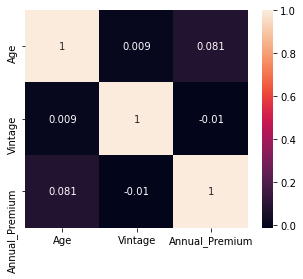

In [27]:
corrmatrix=num_data.corr()
plt.subplots(figsize=(5,4))
sns.heatmap(corrmatrix,annot=True)

Based on the correlation heatmap, we can observe that none of the pairs of numerical features have a considerable relationship with each other.

In [28]:
#drop ID  for now - not useful. 

data = data.drop("id", axis=1)

#### 2.5. Standardize

In [29]:
# Standardizing Annual_Premium feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data['Annual_Premium']=scaler.fit_transform(data['Annual_Premium'].values.reshape(-1,1))

#### 2.6 Feature Engineering

In [30]:
data["region_per_premium"] = data.groupby(["Region_Code"])["Annual_Premium"].transform('mean')
data["region_sum_premium"] = data.groupby(["Region_Code"])["Annual_Premium"].transform('sum')

In [31]:
data

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,region_per_premium,region_sum_premium
0,1,44,1,3,0,2,1,0.735052,5,217,1,0.452327,599.785103
1,1,76,1,5,0,0,0,0.263554,5,183,0,-0.255789,-34.275672
2,1,47,1,3,0,2,1,0.587837,5,27,1,0.452327,599.785103
3,1,21,1,1,1,1,0,-0.071565,2,203,0,-0.138817,-16.380410
4,0,29,1,9,1,1,0,-0.148103,2,39,0,0.080062,18.894683
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,36,1,12,0,2,1,0.723057,1,62,0,0.358429,160.934658
4996,1,44,1,0,0,0,1,-0.152056,1,208,1,-0.379720,-572.237574
4997,1,58,1,3,0,0,1,1.446252,5,105,0,0.452327,599.785103
4998,1,31,1,3,1,0,0,0.462636,1,75,0,0.452327,599.785103


## 3.Exploratory Data Analysis

#### 3.1 Univariate analysis

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


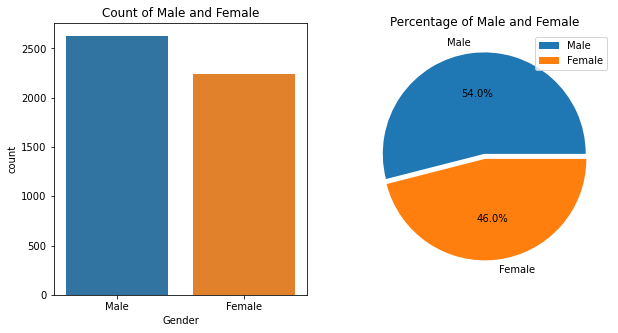

In [32]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)  #Univariate Analysis
plt.title('Count of Male and Female')
sns.countplot(data2['Gender'])

plt.subplot(1,2,2)
plt.pie(data2['Gender'].value_counts(), explode=[0.05,0] ,autopct='%.1f%%', labels=['Male', 'Female'], labeldistance=1.1)
plt.title('Percentage of Male and Female')

plt.legend()
plt.show()

Find:

Above Plots shows that Male tend to subscribe to insurance more than female. Therefore we can assume that gender plays an important role in model building. <br>


C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


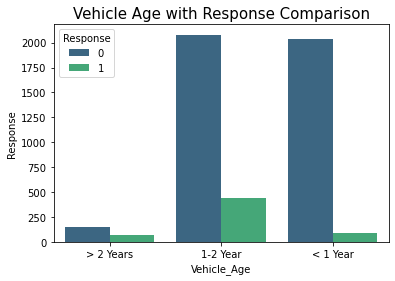

In [33]:
#Univariate Analysis
sns.countplot(data2['Vehicle_Age'],hue=data2['Response'],palette='viridis')
plt.title('Vehicle Age with Response Comparison',fontsize=15)
plt.ylabel('Response')
plt.show()

Find:

We can see that buyers whose vehicle are between 1 to 2 years are more entrusted to buy insurance rather whose vehicle are less than 1 year or more than 2 years

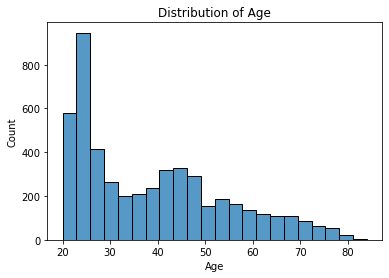

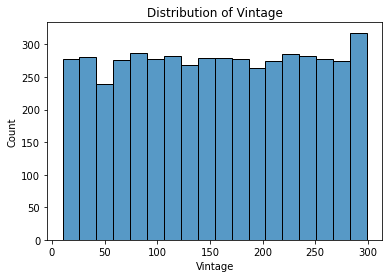

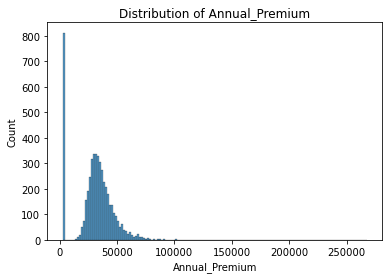

In [34]:
for i in num_data.columns:
    sns.histplot(num_data[i])
    plt.title(f"Distribution of {i}")
    plt.show()

Inference:

Vintage or duration of tenure of customers is uniformly distributed.<br>
Age of most of the insurance holders is around 20-30 years, with a significant number of holders also found to be in the range of 40-50 years.

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


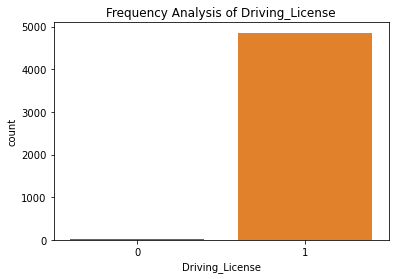

In [35]:
sns.countplot(data2.Driving_License)
plt.title("Frequency Analysis of Driving_License")
plt.show()

Inference:

within driving license, % of those without licence is less than 1%. 

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


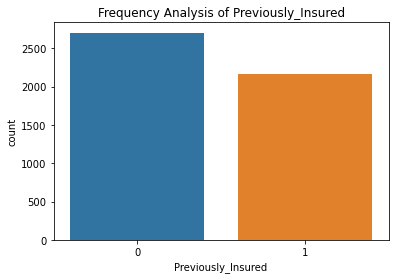

In [36]:
sns.countplot(data2.Previously_Insured)
plt.title("Frequency Analysis of Previously_Insured")
plt.show()

Inference:

health insurance holders who have not previously insured for a vehicle insurance are more than  who have previously insured for a vehicle insurance.

#### 3.2 Bivariate analysis

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Annual_Premium'>

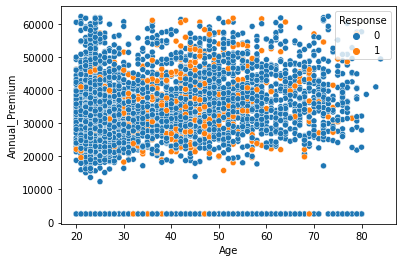

In [58]:
#credit score distribution by income levels
sns.scatterplot(data2.Age,data2.Annual_Premium,hue=data2.Response)

Insight:

young customers with high annual premium are not interested in  vehicle insurance

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Vintage'>

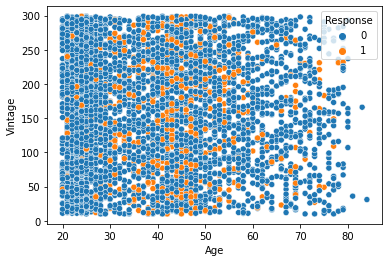

In [59]:
sns.scatterplot(data2.Age,data2.Vintage,hue=data2.Response)

Insight:

Vintage or duration of tenure with insurance company are higher in 20-30 age group ,but they are not interested in vehicle insurance

C:\Users\kevin\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_Premium', ylabel='Vintage'>

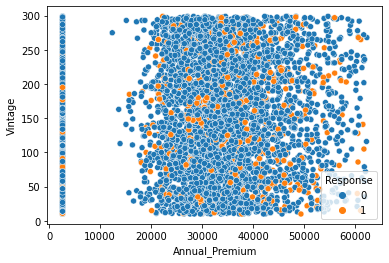

In [60]:
sns.scatterplot(data2.Annual_Premium,data2.Vintage,hue=data2.Response)

Insight:

number of customers with annual premium  more than 50000 are lesser in company

Find:

Based on the scatterplots, on analyzing the relationship between two numerical features, we can conclude that the target classes cannot be seperated by the interaction of two numerical features.

## 4.Modelling

In [40]:
# feature columns
x=data.drop(['Response'],axis=1)
#  target column
y=data['Response']

In [41]:
x

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,region_per_premium,region_sum_premium
0,1,44,1,3,0,2,1,0.735052,5,217,0.452327,599.785103
1,1,76,1,5,0,0,0,0.263554,5,183,-0.255789,-34.275672
2,1,47,1,3,0,2,1,0.587837,5,27,0.452327,599.785103
3,1,21,1,1,1,1,0,-0.071565,2,203,-0.138817,-16.380410
4,0,29,1,9,1,1,0,-0.148103,2,39,0.080062,18.894683
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1,36,1,12,0,2,1,0.723057,1,62,0.358429,160.934658
4996,1,44,1,0,0,0,1,-0.152056,1,208,-0.379720,-572.237574
4997,1,58,1,3,0,0,1,1.446252,5,105,0.452327,599.785103
4998,1,31,1,3,1,0,0,0.462636,1,75,0.452327,599.785103


In [42]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=0.25)

In [43]:
print(" shape of x train",x_train.shape)
print(" shape of y train",y_train.shape)
print(" shape of x test",x_test.shape)
print(" shape of y test",y_test.shape)

 shape of x train (3648, 12)
 shape of y train (3648,)
 shape of x test (1216, 12)
 shape of y test (1216,)


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, precision_score, auc, roc_curve,classification_report,confusion_matrix

In [45]:
model = {
    "Logistic Regressor" : LogisticRegression(),
    "KNeighbor Classifier" : KNeighborsClassifier(n_neighbors=14),
    "DecisionTree Classifier" : DecisionTreeClassifier(), 
    "Gradient Boosting" : GradientBoostingClassifier(),   
    #"Extreme gradient boosting":XGBClassifier(),
    "AdaBoost Classifier" : AdaBoostClassifier(),
    "RandomForest Classifier" : RandomForestClassifier()
        }

In [46]:
scores = []
prob_score = {}
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    try:
        score = classifier.predict_proba(x_test)[:,1]
        roc = roc_auc_score(y_test, score, average='weighted')
        prob_score[mod] = score
        
    except:
        roc = 0
    scores.append([
        mod,
        accuracy_score(y_test, pred),
        f1_score(y_test, pred, average='weighted'),
        precision_score(y_test, pred, average='weighted'),        
        recall_score(y_test, pred, average='weighted'),
        roc,
       
    ])

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

scores_df  = pd.DataFrame(scores)
index_model = {count: s for count, s in enumerate(scores_df[0])}
col = {count+1: s for count, s in enumerate(['Accuracy','F1 Score','Precision','Recall','ROC AUC'])}
scores_df = scores_df.drop(0, axis=1)
scores_df = scores_df.rename(columns=col, index=index_model)
scores_df.style.apply(highlight_max)

,Accuracy,F1 Score,Precision,Recall,ROC AUC
Logistic Regressor,0.879112,0.822556,0.772838,0.879112,0.807729
KNeighbor Classifier,0.877467,0.821737,0.772663,0.877467,0.648352
DecisionTree Classifier,0.822368,0.823394,0.824437,0.822368,0.588006
Gradient Boosting,0.876645,0.827244,0.818745,0.876645,0.830743
AdaBoost Classifier,0.872533,0.827638,0.811737,0.872533,0.822805
RandomForest Classifier,0.872533,0.840109,0.830696,0.872533,0.816320


In [48]:
#cross validating score to ensure the model's strength 
#10 fold cross validation
for mod in model:
    classifier = model[mod]
    classifier.fit(x_train, y_train)
    pred = classifier.predict(x_test)
    scores = cross_val_score(classifier, x_train, y_train, cv=10)
    print(classifier,"'s-Average Cross Validation score :{}".format(np.mean(scores)))

C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LogisticRegression() 's-Average Cross Validation score :0.8791118470570526
KNeighborsClassifier(n_neighbors=14) 's-Average Cross Validation score :0.8780167093180792
DecisionTreeClassifier() 's-Average Cross Validation score :0.8267687791660394
GradientBoostingClassifier() 's-Average Cross Validation score :0.8744535601384916
AdaBoostClassifier() 's-Average Cross Validation score :0.8758271865121179
RandomForestClassifier() 's-Average Cross Validation score :0.871437603492398


Find:<strong>

Classification model which gives the best result to predict  is Random forest Model 

Reasons:

Accuracy is: 0.87 <br>
f1 score is: 0.84 <br>
ROC AUC score:82<br>
Average Cross Validation score :0.87

## 5 Model Fine Tuning

Hyperparameter tuning for random forest model

Using grid search method


In [49]:
rfc=RandomForestClassifier(random_state=42)

In [50]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [51]:
from sklearn.model_selection import GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [52]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'auto',
 'n_estimators': 200}

In [62]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=4, criterion='gini')

In [63]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=200, random_state=42)

In [64]:
pred=rfc1.predict(x_test)

In [65]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.8791118421052632


In [66]:
scores = cross_val_score(rfc1, x_train, y_train, cv=10)
print("Average Cross Validation score :{}".format(np.mean(scores)))

Average Cross Validation score :0.8785639018515731


by Hyperparameter tuning using GridSearchCV randomforest's accuracy increased 

----------------------------------------------------------------------------------------------------------------